In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

----

In [3]:
train_data = pd.read_csv('training_set.csv')
test_data = pd.read_csv('testing_set.csv')

In [4]:
 data = train_data.copy()

In [5]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
cat = [i for i in data.columns if data[i].dtypes == 'O']
num = [i for i in data.columns if data[i].dtypes != 'O']

In [8]:
d_feat = [i for i in data[num].columns if data[i].nunique() <= 15]

In [9]:
cat.extend(d_feat)
len(cat)

58

In [10]:
for i in data.columns:
    if i in cat:
        data[i] = data[i].fillna('NA')
    else:
        data[i] = data[i].fillna(data[i].median())

In [11]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726   
std       1.112799    30.202904     20.645407   180.731373   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.589041     1.767123   472.980137    94.244521    46.660274   
std      23.997022     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1962.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
max    2

----

## Categorical Features

In [12]:
len(cat)

58

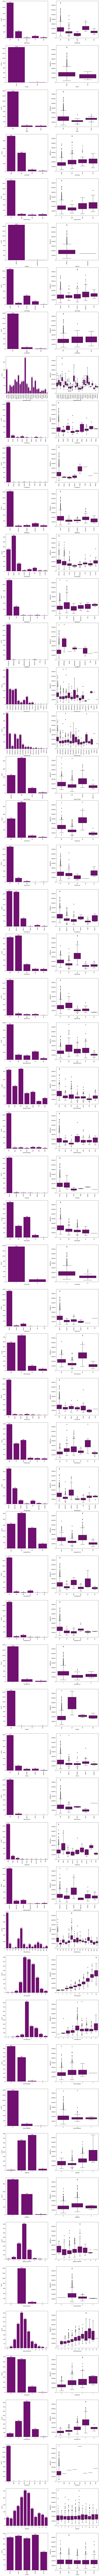

In [13]:
figure = plt.figure(figsize = (15,420))
import itertools

for i,j in itertools.zip_longest(cat, range(1,116,2)):

    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
    plt.subplot(58,2,j)
    plt.xticks(rotation =90)
    ax = sns.countplot(data = data, x = i, color = 'purple')
    ax.bar_label(ax.containers[0])
    
    plt.subplot(58,2,j+1)
    plt.xticks(rotation =90)
    ax = sns.boxplot(data = data, x = i, y = 'SalePrice', color = 'purple')

# Discrete Numerical Features

In [14]:
d_feat = [i for i in data[num].columns if data[i].nunique() <= 15]

In [15]:
d_feat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

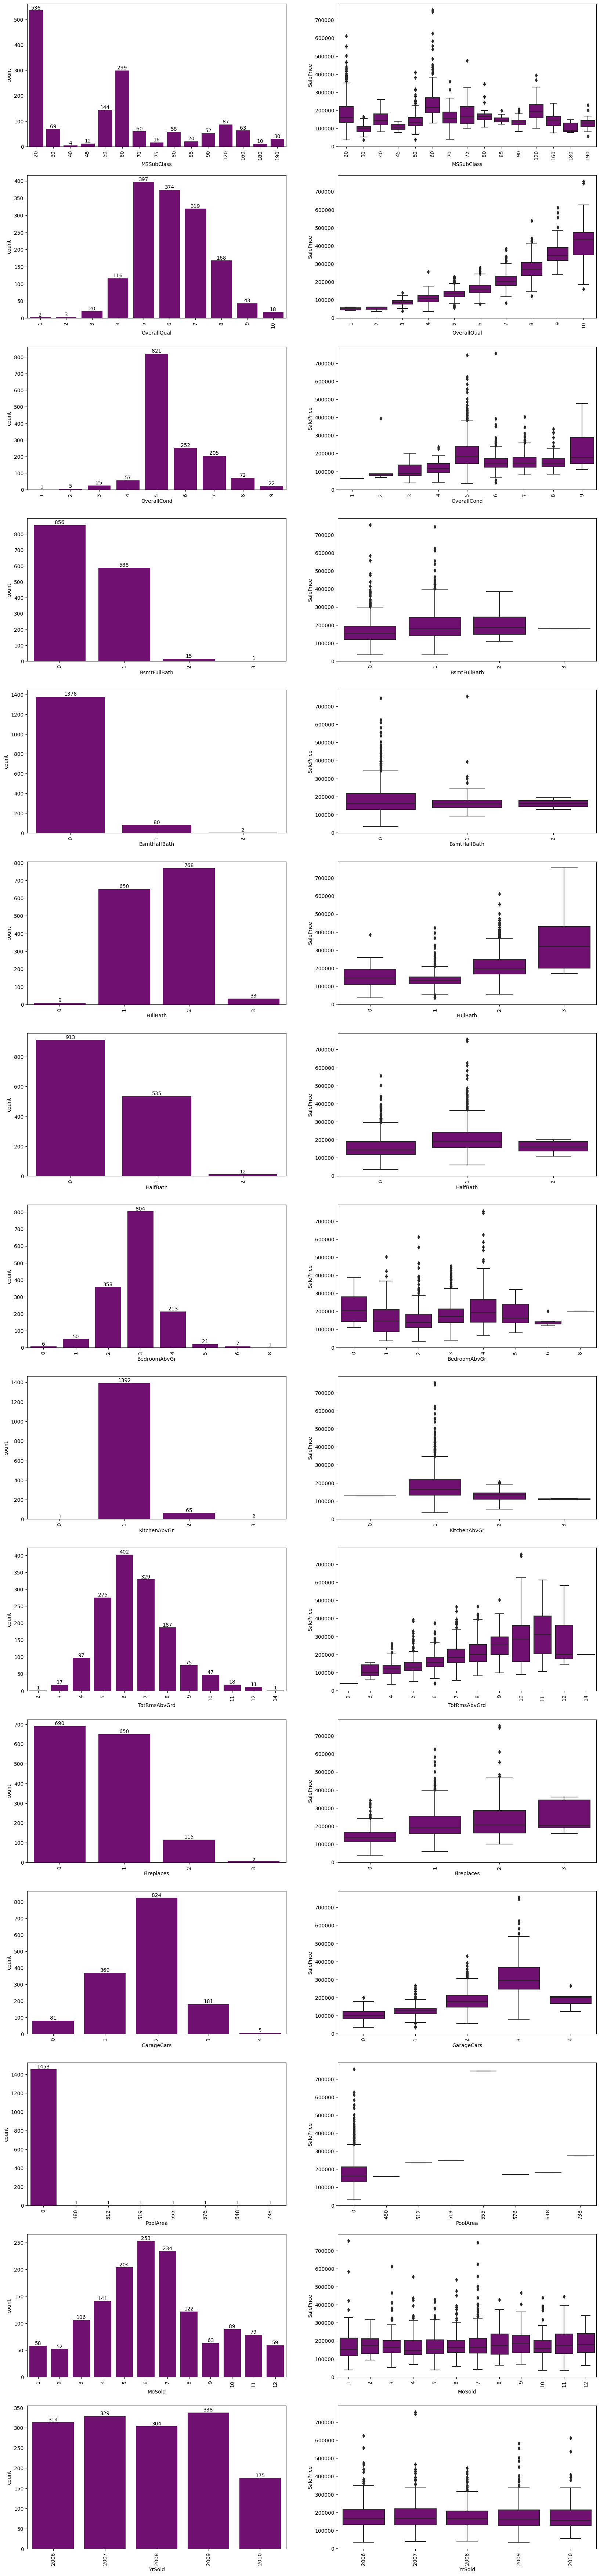

In [16]:
figure = plt.figure(figsize = (20,90))
import itertools

for i,j in itertools.zip_longest(d_feat, range(1,30,2)):

    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
    plt.subplot(15,2,j)
    plt.xticks(rotation = 90)
    ax = sns.countplot(data = data, x = i, color = 'purple')
    ax.bar_label(ax.containers[0])
    
    plt.subplot(15,2,j+1)
    plt.xticks(rotation = 90)
    ax = sns.boxplot(data = data, x = i, y = 'SalePrice', color = 'purple')

# Continuous Numerical Features

In [17]:
c_feat = [i for i in data[num].columns if data[i].nunique() > 15]

In [18]:
len(c_feat)

23

In [19]:
def pp(a,b,c):
    sns.pairplot(data = data, x_vars = [a,b,c], y_vars = 'SalePrice',size=4, aspect=1, kind='scatter')
    plt.show()

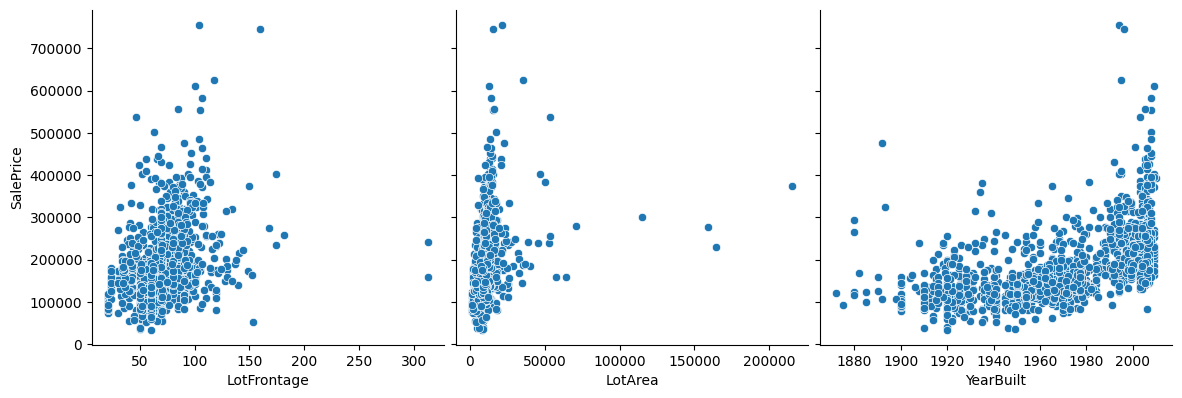

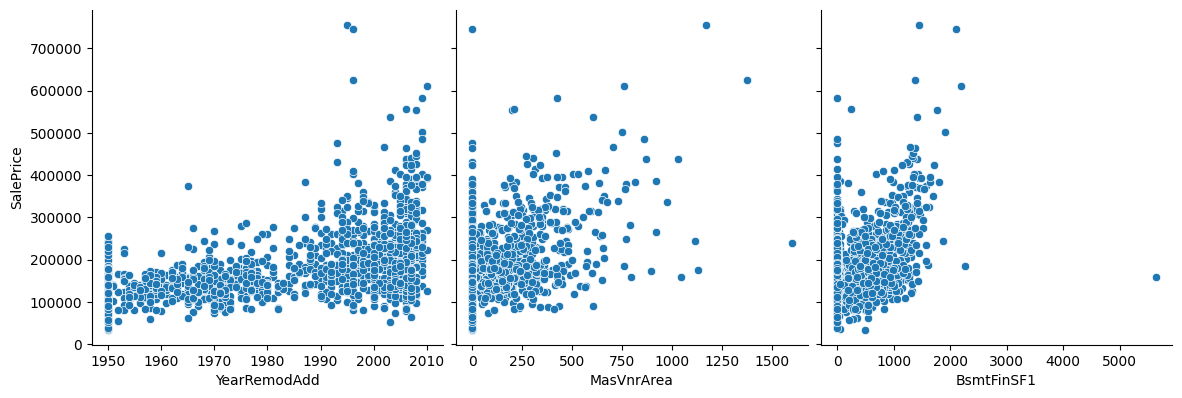

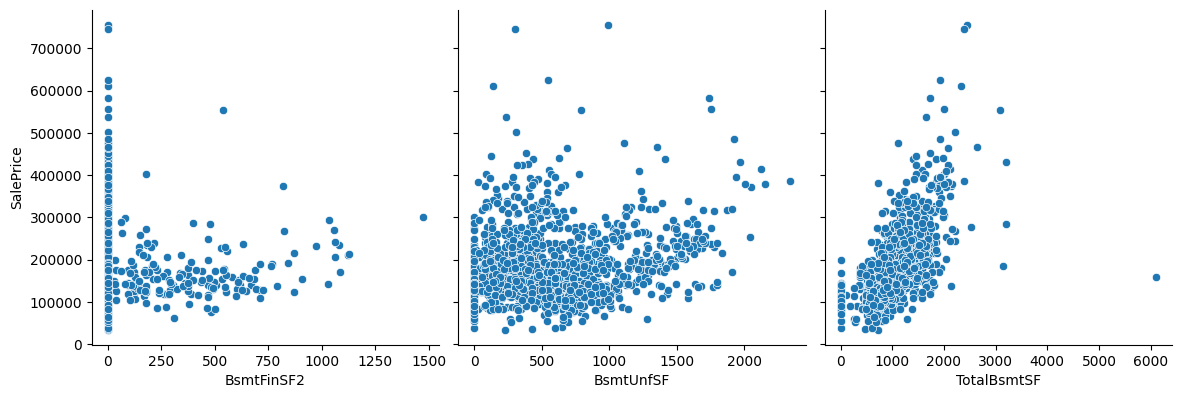

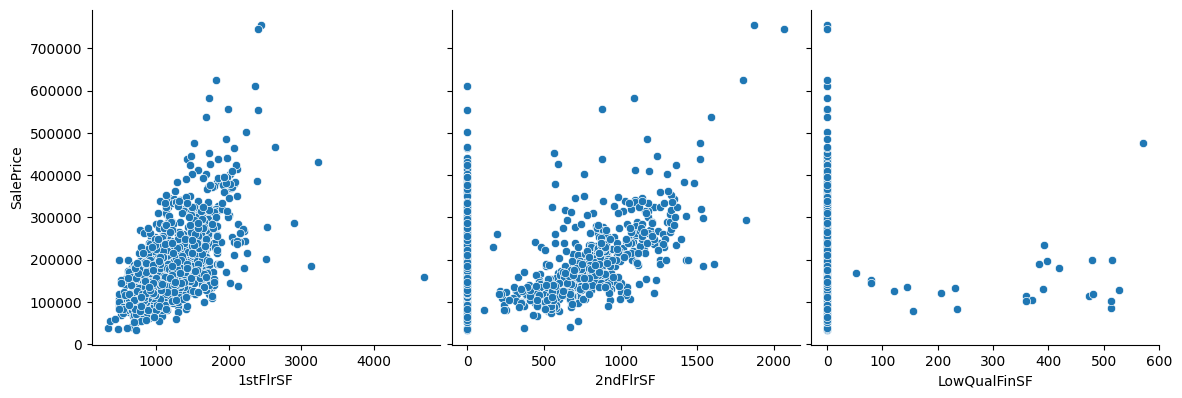

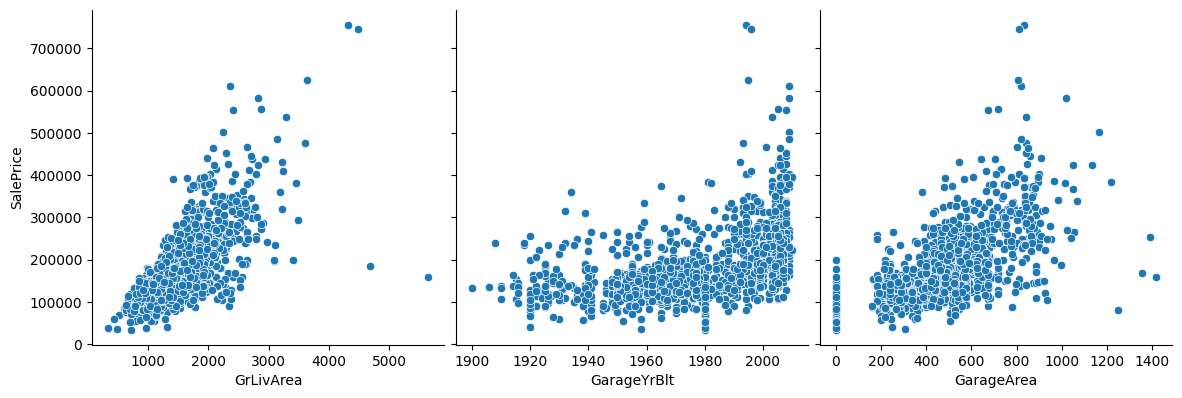

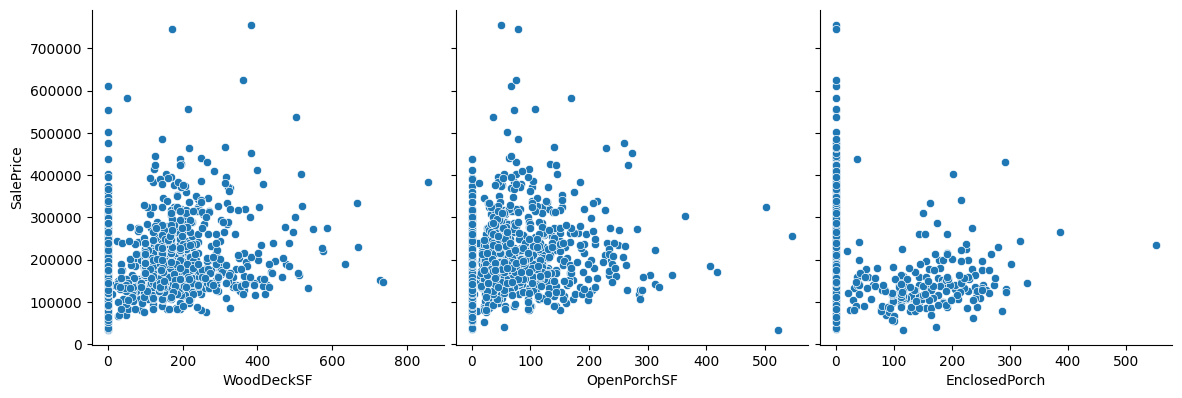

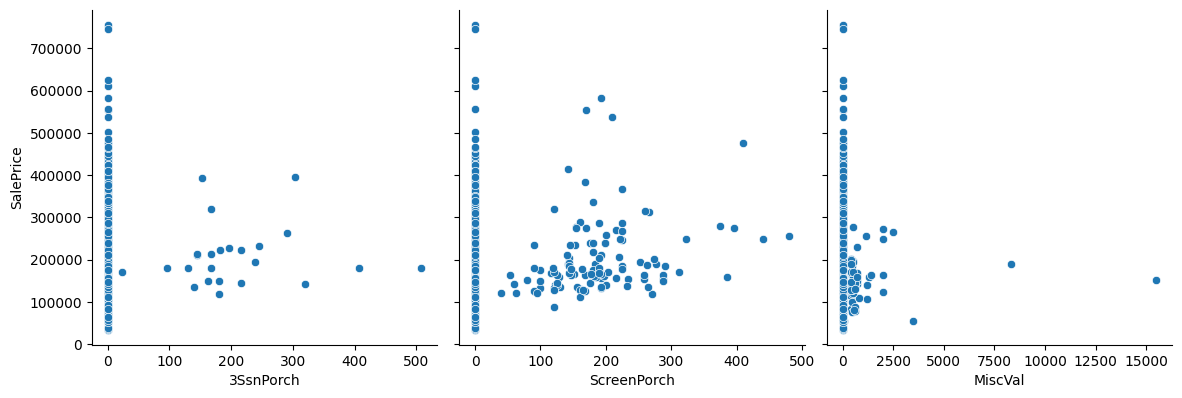

In [20]:
for i,j in itertools.zip_longest(range(1,21,3), range(4,23,3)):
    lst = c_feat[i:j]
    pp(lst[0],lst[1],lst[2])
    
    

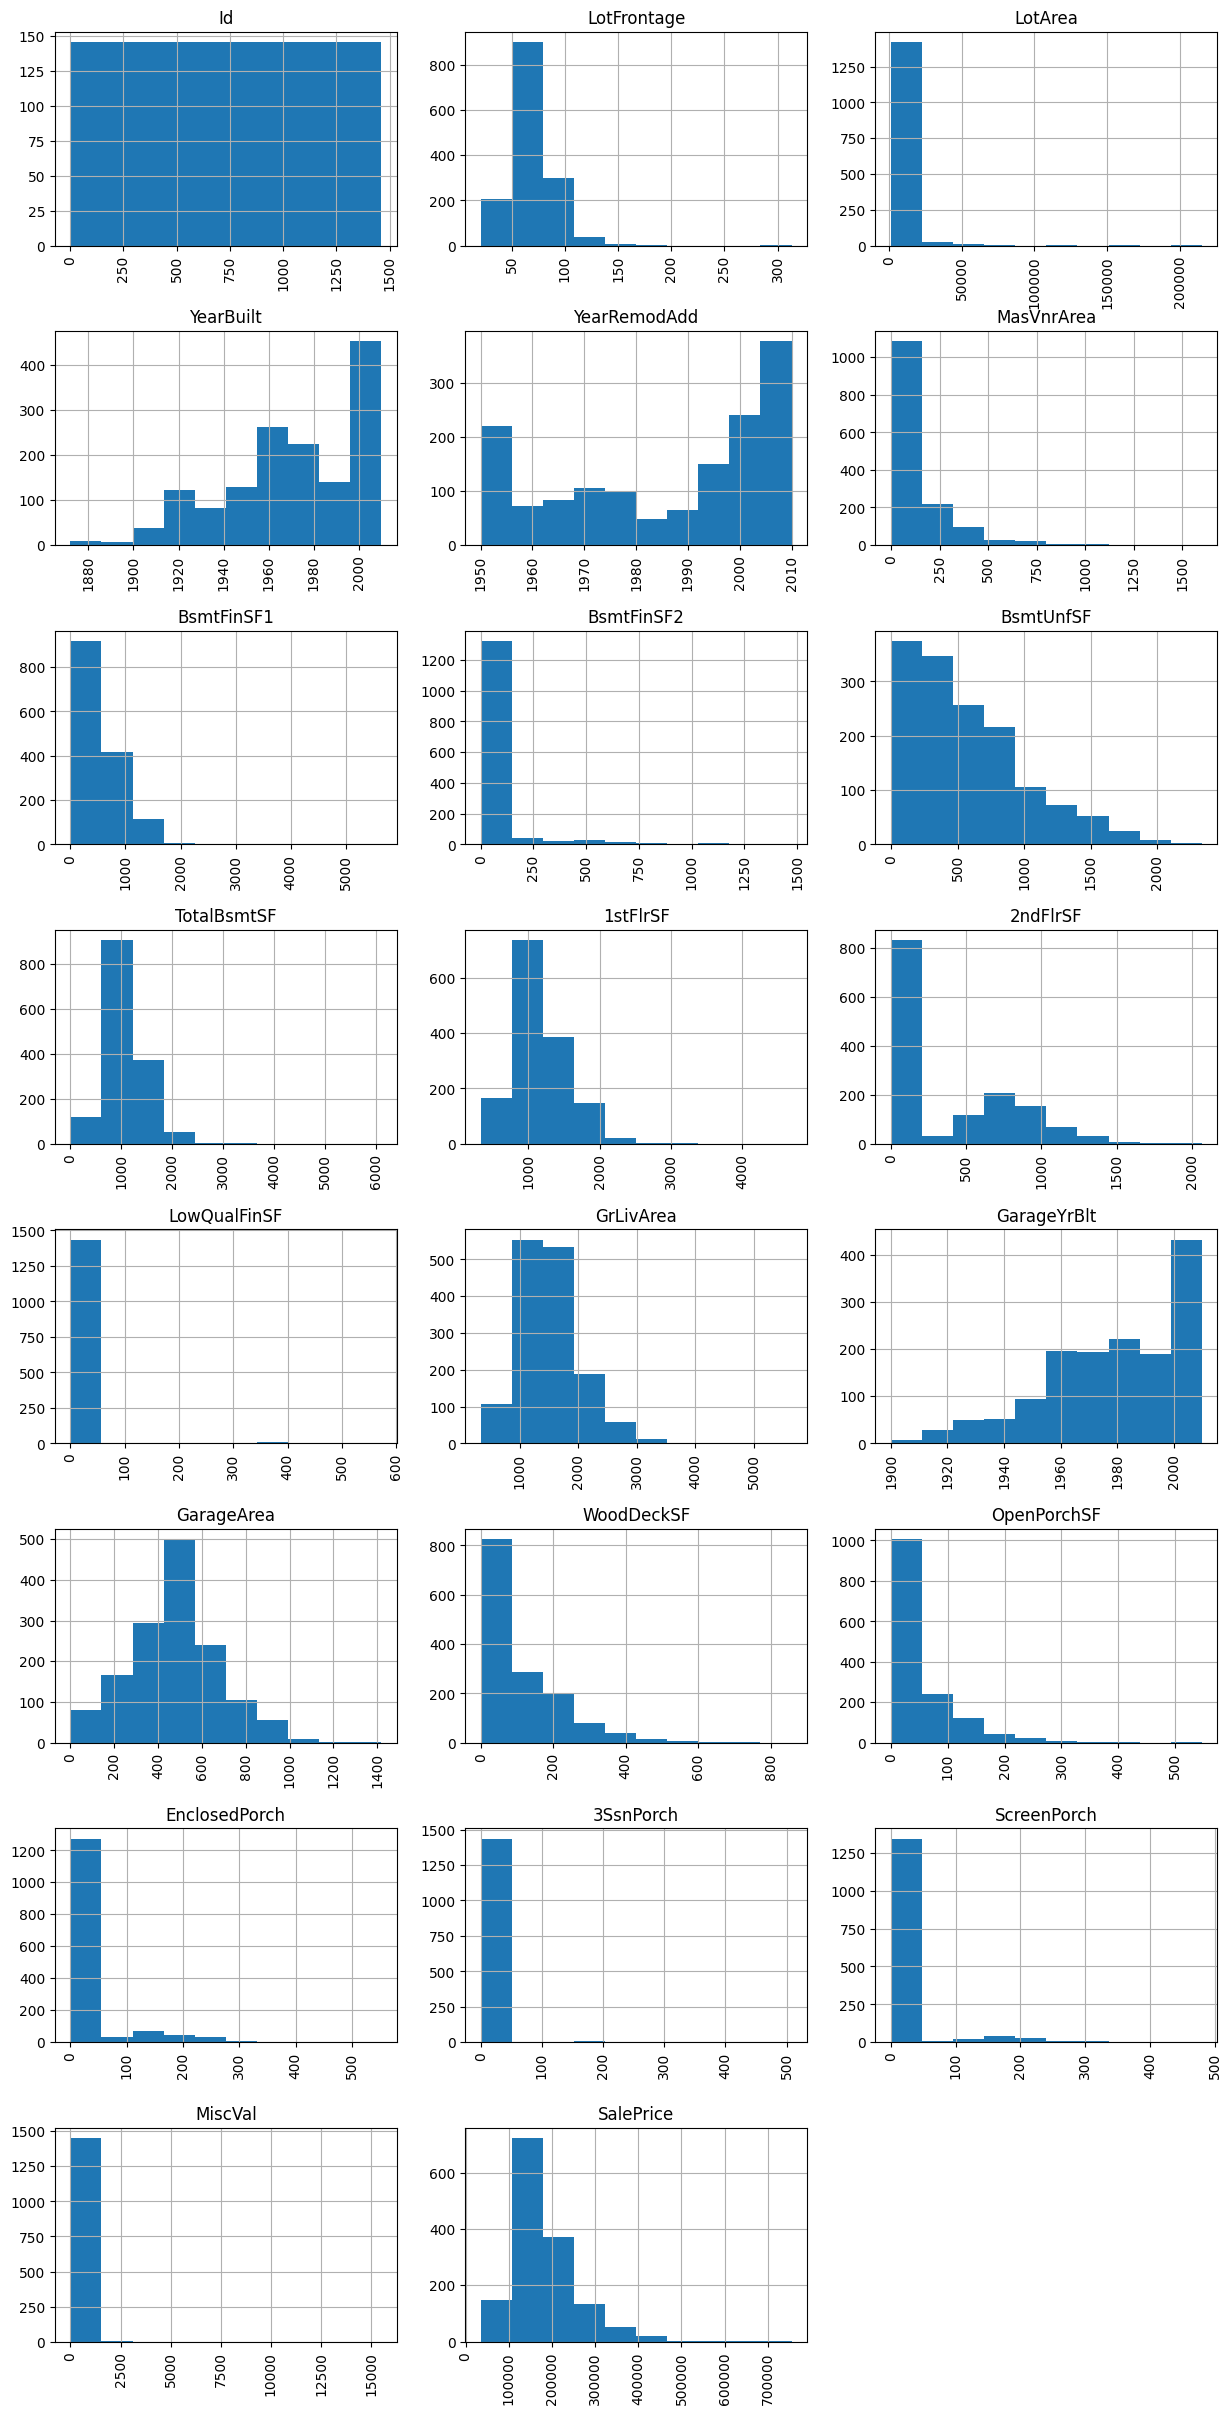

In [21]:
figure = plt.figure(figsize = (15,30))
for i,j in itertools.zip_longest(c_feat, range(1,24)):
    plt.subplot(8,3,j)
    plt.subplots_adjust(wspace =0.2, hspace =0.4)
    data[i].hist()
    plt.title(i)
    plt.xticks(rotation = 90)

# Time line data

In [22]:
yr_feat = [i for i in data.columns if 'Yr' in i or 'Year' in i]
yr_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [23]:
dum = data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice']]
dum['YearBuilt'] = dum['YrSold'] - dum['YearBuilt'] 
dum['YearRemodAdd'] = dum['YrSold'] - dum['YearRemodAdd']
dum['GarageYrBlt'] = dum['YrSold'] - dum['GarageYrBlt']

In [24]:
dum

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  SalePrice
0             5             5          5.0    2008     208500
1            31            31         31.0    2007     181500
2             7             6          7.0    2008     223500
3            91            36          8.0    2006     140000
4             8             8          8.0    2008     250000
...         ...           ...          ...     ...        ...
1455          8             7          8.0    2007     175000
1456         32            22         32.0    2010     210000
1457         69             4         69.0    2010     266500
1458         60            14         60.0    2010     142125
1459         43            43         43.0    2008     147500

[1460 rows x 5 columns]

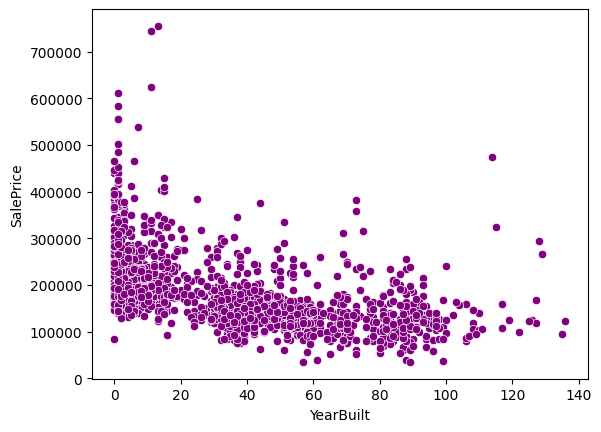

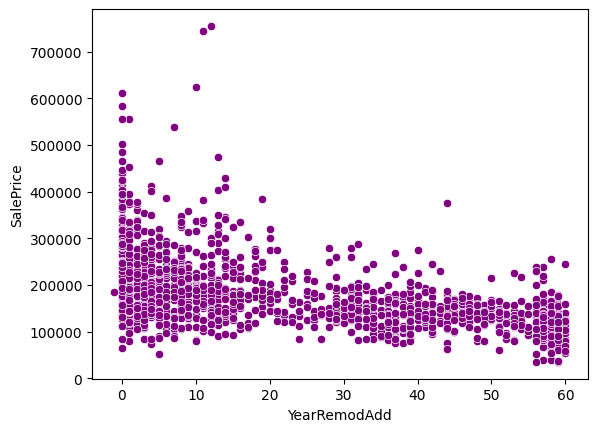

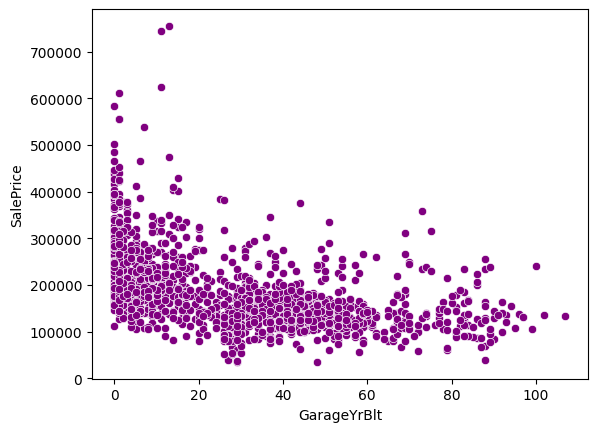

In [25]:
for i in yr_feat[0:3]:
    sns.scatterplot(data = dum, x = i, y = 'SalePrice', color = 'purple')
    plt.show()
    

----

## Categorical Feature Scaling

### Defining rare category

In [26]:
n_rare = []

for i in cat:
    temp = data.groupby(by = i)['SalePrice'].count() / len(data)
    temp_df = temp[temp>0.01].index
    n_rare.extend(temp_df)
    data[i] = np.where(data[i].isin(n_rare),data[i], 'rare_var')

In [27]:
data[cat]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave    NA      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave    NA      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1        rare_var      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd         NA        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng         NA        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd         NA        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd         NA        Ex        Gd   
1458  CompShg     MetalSd     MetalSd         NA        TA        TA   
1459  CompShg     HdBoard     HdBoard         NA        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

### Labeling Categorical data

In [28]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
dic_labels = {}
for i in cat:
    labels = data.groupby(by = i)['SalePrice'].mean().sort_values().index
    label_ordered = {k:j for j,k in enumerate(labels, 0)}
    dic_labels[i] = label_ordered
    data[i] = data[i].map(label_ordered)

In [30]:
train_unique = []
for i in data[cat].columns:
    a = data[i].unique()
    train_unique.extend(a)
    

In [31]:
dic_labels

{'MSZoning': {'rare_var': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4},
 'Street': {'rare_var': 0, 'Pave': 1},
 'Alley': {'Grvl': 0, 'Pave': 1, 'NA': 2},
 'LotShape': {'Reg': 0, 'IR1': 1, 'rare_var': 2, 'IR2': 3},
 'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
 'Utilities': {'rare_var': 0, 'AllPub': 1},
 'LotConfig': {'Inside': 0,
  'FR2': 1,
  'Corner': 2,
  'rare_var': 3,
  'CulDSac': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'rare_var': 2},
 'Neighborhood': {'MeadowV': 0,
  'IDOTRR': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'Edwards': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'SWISU': 7,
  'NAmes': 8,
  'Mitchel': 9,
  'SawyerW': 10,
  'NWAmes': 11,
  'rare_var': 12,
  'Gilbert': 13,
  'Blmngtn': 14,
  'CollgCr': 15,
  'Crawfor': 16,
  'ClearCr': 17,
  'Somerst': 18,
  'Timber': 19,
  'StoneBr': 20,
  'NridgHt': 21,
  'NoRidge': 22},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'rare_var': 2,
  'RRAn': 3,
  'Norm': 4,
  'PosN': 5},
 'Condition2': {'Artery': 0,
  'Feedr': 1,
  'RRAn': 2,
  'r

In [32]:
data

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          12         3         65.0     8450       1      2   
1        2           9         3         80.0     9600       1      2   
2        3          12         3         68.0    11250       1      2   
3        4           7         3         60.0     9550       1      2   
4        5          12         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          12         3         62.0     7917       1      2   
1456  1457           9         3         85.0    13175       1      2   
1457  1458           7         3         66.0     9042       1      2   
1458  1459           9         3         68.0     9717       1      2   
1459  1460           9         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            0            1          1          0          0            15   
1            0            1          1          1          0            12   
2            1            1          1          0          0            15   
3            1            1          1          2          0            16   
4            1            1          1          1          0            22   
...        ...          ...        ...        ...        ...           ...   
1455         0            1          1          0          0            13   
1456         0            1          1          0          0            11   
1457         0            1          1          0          0            16   
1458         0            1          1          0          0             8   
1459         0            1          1          0          0             4   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              4           4         4           5            5            6   
1              1           4         4           4            4            4   
2              4           4         4           5            5            6   
3              4           4         4           5            5            6   
4              4           4         4           5            6            6   
...          ...         ...       ...         ...          ...          ...   
1455           4           4         4           5            4            6   
1456           4           4         4           4            4            3   
1457           4           4         4           5            5            7   
1458           4           4         4           4            3            3   
1459           4           4         4           4            3            3   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0          2003          2003          0         0            9            9   
1          1976          1976          0         0            1            2   
2          2001          2002          0         0            9            9   
3          1915          1970          0         0            2            4   
4          2000          2000          0         0            9            9   
...         ...           ...        ...       ...          ...          ...   
1455       1999          2000          0         0            9            9   
1456       1978          1988          0         0            7            6   
1457       1941          2006          0         0           10           10   
1458       1950          1996          2         0            1            2   
1459       1965          1965          0         0            6            5   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              2       196.0          2          3           5         3   
1              1         0.0          1          3           2         3   
2              2       162.0          2     

## Normalizing Continuous Data

In [33]:
norm_feat = [i for i in c_feat if 0 not in data[i].unique() and i not in ['Id']]
norm_feat

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'SalePrice']

In [34]:
for i in norm_feat:
    data[i] = np.log(data[i])

In [35]:
data

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0        1          12         3     4.174387  9.041922       1      2   
1        2           9         3     4.382027  9.169518       1      2   
2        3          12         3     4.219508  9.328123       1      2   
3        4           7         3     4.094345  9.164296       1      2   
4        5          12         3     4.430817  9.565214       1      2   
...    ...         ...       ...          ...       ...     ...    ...   
1455  1456          12         3     4.127134  8.976768       1      2   
1456  1457           9         3     4.442651  9.486076       1      2   
1457  1458           7         3     4.189655  9.109636       1      2   
1458  1459           9         3     4.219508  9.181632       1      2   
1459  1460           9         3     4.317488  9.204020       1      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            0            1          1          0          0            15   
1            0            1          1          1          0            12   
2            1            1          1          0          0            15   
3            1            1          1          2          0            16   
4            1            1          1          1          0            22   
...        ...          ...        ...        ...        ...           ...   
1455         0            1          1          0          0            13   
1456         0            1          1          0          0            11   
1457         0            1          1          0          0            16   
1458         0            1          1          0          0             8   
1459         0            1          1          0          0             4   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              4           4         4           5            5            6   
1              1           4         4           4            4            4   
2              4           4         4           5            5            6   
3              4           4         4           5            5            6   
4              4           4         4           5            6            6   
...          ...         ...       ...         ...          ...          ...   
1455           4           4         4           5            4            6   
1456           4           4         4           4            4            3   
1457           4           4         4           5            5            7   
1458           4           4         4           4            3            3   
1459           4           4         4           4            3            3   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0      7.602401      7.602401          0         0            9            9   
1      7.588830      7.588830          0         0            1            2   
2      7.601402      7.601902          0         0            9            9   
3      7.557473      7.585789          0         0            2            4   
4      7.600902      7.600902          0         0            9            9   
...         ...           ...        ...       ...          ...          ...   
1455   7.600402      7.600902          0         0            9            9   
1456   7.589842      7.594884          0         0            7            6   
1457   7.570959      7.603898          0         0           10           10   
1458   7.575585      7.598900          2         0            1            2   
1459   7.583248      7.583248          0         0            6            5   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              2       196.0          2          3           5         3   
1              1         0.0          1          3           2         3   
2              2       162.0    

----

# Feature Scaling

In [36]:
scaler = MinMaxScaler()

In [37]:
feature_scale = [i for i in data.columns if i not in ['Id', 'SalePrice']]
len(feature_scale)

79

In [38]:
scaler.fit(data[feature_scale])

MinMaxScaler()

In [39]:
tr_data = pd.concat([data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [40]:
tr_data

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0        1  12.247694    1.000000      0.75     0.418208  0.366344     1.0   
1        2  12.109011    0.750000      0.75     0.495064  0.391317     1.0   
2        3  12.317167    1.000000      0.75     0.434909  0.422359     1.0   
3        4  11.849398    0.583333      0.75     0.388581  0.390295     1.0   
4        5  12.429216    1.000000      0.75     0.513123  0.468761     1.0   
...    ...        ...         ...       ...          ...       ...     ...   
1455  1456  12.072541    1.000000      0.75     0.400718  0.353592     1.0   
1456  1457  12.254863    0.750000      0.75     0.517503  0.453273     1.0   
1457  1458  12.493130    0.583333      0.75     0.423859  0.379597     1.0   
1458  1459  11.864462    0.750000      0.75     0.434909  0.393688     1.0   
1459  1460  11.901583    0.750000      0.75     0.471175  0.398069     1.0   

      Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0       1.0  0.000000     0.333333        1.0       0.00        0.0   
1       1.0  0.000000     0.333333        1.0       0.25        0.0   
2       1.0  0.333333     0.333333        1.0       0.00        0.0   
3       1.0  0.333333     0.333333        1.0       0.50        0.0   
4       1.0  0.333333     0.333333        1.0       0.25        0.0   
...     ...       ...          ...        ...        ...        ...   
1455    1.0  0.000000     0.333333        1.0       0.00        0.0   
1456    1.0  0.000000     0.333333        1.0       0.00        0.0   
1457    1.0  0.000000     0.333333        1.0       0.00        0.0   
1458    1.0  0.000000     0.333333        1.0       0.00        0.0   
1459    1.0  0.000000     0.333333        1.0       0.00        0.0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0         0.681818         0.8         0.8       1.0         1.0        0.625   
1         0.545455         0.2         0.8       1.0         0.8        0.500   
2         0.681818         0.8         0.8       1.0         1.0        0.625   
3         0.727273         0.8         0.8       1.0         1.0        0.625   
4         1.000000         0.8         0.8       1.0         1.0        0.750   
...            ...         ...         ...       ...         ...          ...   
1455      0.590909         0.8         0.8       1.0         1.0        0.500   
1456      0.500000         0.8         0.8       1.0         0.8        0.500   
1457      0.727273         0.8         0.8       1.0         1.0        0.625   
1458      0.363636         0.8         0.8       1.0         0.8        0.375   
1459      0.181818         0.8         0.8       1.0         0.8        0.375   

      OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0        0.857143   0.950952      0.884883        0.0       0.0          0.9   
1        0.571429   0.760147      0.437059        0.0       0.0          0.1   
2        0.857143   0.936907      0.868405        0.0       0.0          0.9   
3        0.857143   0.319290      0.336712        0.0       0.0          0.2   
4        0.857143   0.929879      0.835424        0.0       0.0          0.9   
...           ...        ...           ...        ...       ...          ...   
1455     0.857143   0.922847      0.835424        0.0       0.0          0.9   
1456     0.428571   0.774370      0.636843        0.0       0.0          0.7   
1457     1.000000   0.508889      0.934268        0.0       0.0          1.0   
1458     0.428571   0.573928      0.769363        1.0       0.0          0.1   
1459     0.428571   0.681663      0.252855        0.0       0.0          0.6   

      Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0             0.9    0.666667    0.122500   0.666667       0.75         1.0   
1             0.2    0.333333    0.000000   0.333333       0.75         0.4   
2             0.9    0.666667    0.101250   0.6

----

# Feature Selection

In [41]:
y = tr_data['SalePrice']
X = tr_data.drop(['Id','SalePrice'], axis = 1)

In [42]:
model = SelectFromModel(Lasso(alpha = 0.01))

In [43]:
model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.01))

In [44]:
model.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [45]:
selected_feat = X.columns[model.get_support()]
selected_feat

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtExposure', 'CentralAir', 'BsmtFullBath', 'FullBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars'],
      dtype='object')

In [46]:
len(selected_feat)

17

In [47]:
X = X[selected_feat]
X.shape

(1460, 17)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   float64
 1   Neighborhood  1460 non-null   float64
 2   OverallQual   1460 non-null   float64
 3   YearRemodAdd  1460 non-null   float64
 4   RoofStyle     1460 non-null   float64
 5   BsmtExposure  1460 non-null   float64
 6   CentralAir    1460 non-null   float64
 7   BsmtFullBath  1460 non-null   float64
 8   FullBath      1460 non-null   float64
 9   BedroomAbvGr  1460 non-null   float64
 10  KitchenQual   1460 non-null   float64
 11  TotRmsAbvGrd  1460 non-null   float64
 12  Fireplaces    1460 non-null   float64
 13  FireplaceQu   1460 non-null   float64
 14  GarageType    1460 non-null   float64
 15  GarageFinish  1460 non-null   float64
 16  GarageCars    1460 non-null   float64
dtypes: float64(17)
memory usage: 194.0 KB


# Model Training and Evaluation

In [50]:
ridge = Ridge()

In [51]:
hyperparameters ={'alpha' : [1e-5,1e-4,1e-3,1,0.01, 0.1, 0.5, 1, 2, 3, 5, 7, 10 ]}

In [52]:
RR = GridSearchCV(ridge, hyperparameters, scoring = 'neg_mean_squared_error', cv = 5) 

In [53]:
RR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 1, 0.01, 0.1, 0.5, 1,
                                   2, 3, 5, 7, 10]},
             scoring='neg_mean_squared_error')

In [54]:
print("Best value for lambda : ",RR.best_params_)
print("Best score for cost function: ", RR.best_score_)

Best value for lambda :  {'alpha': 0.5}
Best score for cost function:  -0.02362142296401359


In [55]:
lasso = Lasso()

In [56]:
ls = GridSearchCV(lasso, hyperparameters, scoring = 'neg_mean_squared_error', cv = 5 )

In [57]:
ls.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 1, 0.01, 0.1, 0.5, 1,
                                   2, 3, 5, 7, 10]},
             scoring='neg_mean_squared_error')

In [58]:
print("Best value for lambda : ",ls.best_params_)
print("Best score for cost function: ", ls.best_score_)

Best value for lambda :  {'alpha': 1e-05}
Best score for cost function:  -0.023629799607763895


In [59]:
predict_ridge = RR.predict(x_test)
predict_lasso = ls.predict(x_test)

<Axes: xlabel='SalePrice', ylabel='Density'>

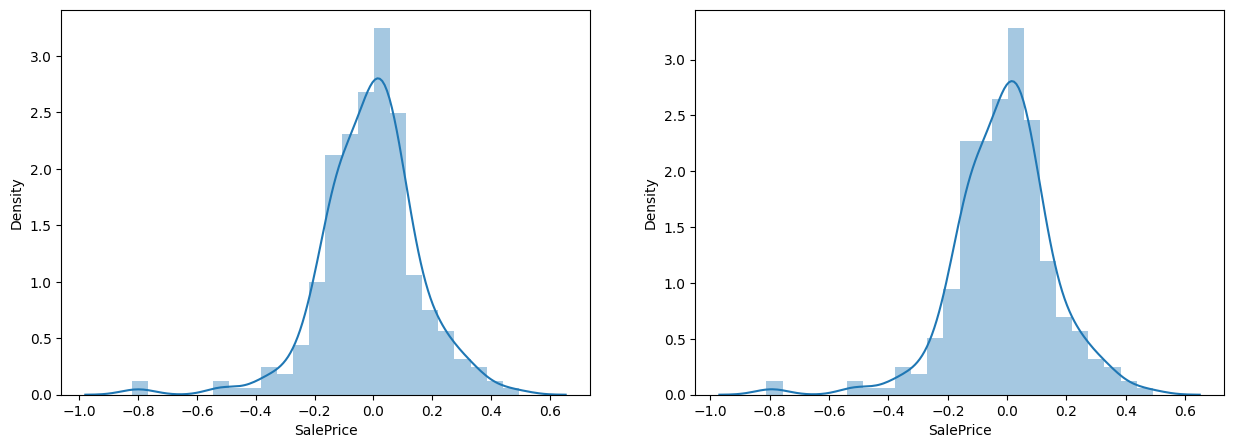

In [60]:
figure = plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(y_test-predict_ridge)
plt.subplot(1,2,2)
sns.distplot(y_test-predict_lasso)

 ----

# Test Data

In [61]:
df = test_data.copy()

In [62]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [64]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [65]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard        NaN   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

In [66]:
for i in df.columns:
    if i in cat:
        df[i] = df[i].fillna('NA')
    else:
        df[i] = df[i].fillna(df[i].median())

In [67]:
for i in cat:
    df[i] = np.where(df[i].isin(n_rare), df[i],'rare_var')

In [68]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461         20       RH         80.0    11622   Pave    NA      Reg   
1  1462         20       RL         81.0    14267   Pave    NA      IR1   
2  1463         60       RL         74.0    13830   Pave    NA      IR1   
3  1464         60       RL         78.0     9978   Pave    NA      IR1   
4  1465        120       RL         43.0     5005   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     1Story           5           6       1961   
1       Norm     1Fam     1Story           6           6       1958   
2       Norm     1Fam     2Story           5           5       1997   
3       Norm     1Fam     2Story           6           6       1998   
4       Norm   TwnhsE     1Story           8           5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd         NA   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd         NA   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard         NA   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0        896          0.0          0.0        1        0            2   
1       1329          0.0          0.0        1        1            3   
2       1629          0.0          0.0        2        1            3   
3       1604          0.0          0.0        2        1            3   
4       1280          0.0          0.0        2        0            2   

  KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu  \
0            1          TA            5        Typ          0          NA   
1            1          Gd            6        Typ          0          NA   
2            1          TA            6        Typ          1          TA   
3            1          Gd            7        Typ          1          Gd   
4           

In [69]:
for i in dic_labels:
    if 'NA' not in dic_labels[i]:
        dar = dic_labels[i][list(dic_labels[i])[-1]] + 1
        dic_labels[i]['NA'] = dar

In [70]:
dic_labels['ExterQual']['Fa'] = 5
dic_labels['Street']['Grvl'] = 3
dic_labels['TotRmsAbvGrd']['12'] = 12
dic_labels['FullBath']['4'] = 4
dic_labels['Exterior2nd']['CBlock'] = 12
dic_labels['Exterior2nd']['Stone'] = 13
dic_labels['RoofStyle']['Shed'] = 1
dic_labels['ExterCond']['Po'] = 6
dic_labels['HeatingQC']['Po'] = 6
dic_labels['Exterior1st']['CBlock'] = 12
dic_labels['Fireplaces']['4'] = 5
dic_labels['BsmtCond']['Po'] = 5
dic_labels['OverallQual']['2'] = 10
dic_labels['OverallQual']['1'] = 11
dic_labels['OverallCond']['2'] = 10
dic_labels['OverallCond']['1'] = 9
dic_labels['GarageCars']['5'] = 6

In [71]:
dic_labels

{'MSZoning': {'rare_var': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4, 'NA': 5},
 'Street': {'rare_var': 0, 'Pave': 1, 'NA': 2, 'Grvl': 3},
 'Alley': {'Grvl': 0, 'Pave': 1, 'NA': 2},
 'LotShape': {'Reg': 0, 'IR1': 1, 'rare_var': 2, 'IR2': 3, 'NA': 4},
 'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3, 'NA': 4},
 'Utilities': {'rare_var': 0, 'AllPub': 1, 'NA': 2},
 'LotConfig': {'Inside': 0,
  'FR2': 1,
  'Corner': 2,
  'rare_var': 3,
  'CulDSac': 4,
  'NA': 5},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'rare_var': 2, 'NA': 3},
 'Neighborhood': {'MeadowV': 0,
  'IDOTRR': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'Edwards': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'SWISU': 7,
  'NAmes': 8,
  'Mitchel': 9,
  'SawyerW': 10,
  'NWAmes': 11,
  'rare_var': 12,
  'Gilbert': 13,
  'Blmngtn': 14,
  'CollgCr': 15,
  'Crawfor': 16,
  'ClearCr': 17,
  'Somerst': 18,
  'Timber': 19,
  'StoneBr': 20,
  'NridgHt': 21,
  'NoRidge': 22,
  'NA': 23},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'rare_var': 2,
  'RRAn': 3,

In [72]:
df['BsmtFullBath'] = df['BsmtFullBath'].astype(str).apply(lambda x: x.replace('.0',''))
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype(str).apply(lambda x: x.replace('.0',''))
df['GarageCars'] = df['GarageCars'].astype(str).apply(lambda x: x.replace('.0',''))

In [73]:
for i in cat:
    df[i] = df[i].map(dic_labels[i])

In [74]:
df['BsmtFullBath'] = df['BsmtFullBath'].astype(int)
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype(str)
df['GarageCars'] = df['GarageCars'].astype(str)

In [75]:
df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461           9         2         80.0    11622       1      2   
1     1462           9         3         81.0    14267       1      2   
2     1463          12         3         74.0    13830       1      2   
3     1464          12         3         78.0     9978       1      2   
4     1465          11         3         43.0     5005       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915           4         1         21.0     1936       1      2   
1455  2916           4         1         21.0     1894       1      2   
1456  2917           9         3        160.0    20000       1      2   
1457  2918           6         3         62.0    10441       1      2   
1458  2919          12         3         74.0     9627       1      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            0            1          1          0          0             8   
1            1            1          1          2          0             8   
2            1            1          1          0          0            13   
3            1            1          1          0          0            13   
4            1            3          1          0          0            20   
...        ...          ...        ...        ...        ...           ...   
1454         0            1          1          0          0             0   
1455         0            1          1          0          0             0   
1456         0            1          1          0          0             9   
1457         0            1          1          0          0             9   
1458         0            1          1          0          1             9   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              1           4         4           4            3            3   
1              4           4         4           4            4            3   
2              4           4         4           5            3            6   
3              4           4         4           5            4            3   
4              4           4         3           4            6            6   
...          ...         ...       ...         ...          ...          ...   
1454           4           4         2           5            2            5   
1455           4           4         3           5            2            6   
1456           4           4         4           4            3            5   
1457           4           4         4           0            3            6   
1458           4           4         4           5            5            6   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0          1961          1961          0         0            9            9   
1          1958          1958          2         0            2            1   
2          1997          1998          0         0            9            9   
3          1998          1998          0         0            9            9   
4          1992          1992          0         0            6            5   
...         ...           ...        ...       ...          ...          ...   
1454       1970          1970          0         0           10           10   
1455       1970          1970          0         0           10           10   
1456       1960          1996          0         0            9            9   
1457       1992          1992          0         0            6            4   
1458       1993          1994          0         0            6            5   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              1         0.0          1          3           2         2   
1              2       108.0          1          3           2         2   
2              1         0.0          1     

In [76]:
for i in norm_feat[0:7]:
    df[i] = np.log(df[i])

In [77]:
df

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0     1461           9         2     4.382027  9.360655       1      2   
1     1462           9         3     4.394449  9.565704       1      2   
2     1463          12         3     4.304065  9.534595       1      2   
3     1464          12         3     4.356709  9.208138       1      2   
4     1465          11         3     3.761200  8.518193       1      2   
...    ...         ...       ...          ...       ...     ...    ...   
1454  2915           4         1     3.044522  7.568379       1      2   
1455  2916           4         1     3.044522  7.546446       1      2   
1456  2917           9         3     5.075174  9.903488       1      2   
1457  2918           6         3     4.127134  9.253496       1      2   
1458  2919          12         3     4.304065  9.172327       1      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            0            1          1          0          0             8   
1            1            1          1          2          0             8   
2            1            1          1          0          0            13   
3            1            1          1          0          0            13   
4            1            3          1          0          0            20   
...        ...          ...        ...        ...        ...           ...   
1454         0            1          1          0          0             0   
1455         0            1          1          0          0             0   
1456         0            1          1          0          0             9   
1457         0            1          1          0          0             9   
1458         0            1          1          0          1             9   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              1           4         4           4            3            3   
1              4           4         4           4            4            3   
2              4           4         4           5            3            6   
3              4           4         4           5            4            3   
4              4           4         3           4            6            6   
...          ...         ...       ...         ...          ...          ...   
1454           4           4         2           5            2            5   
1455           4           4         3           5            2            6   
1456           4           4         4           4            3            5   
1457           4           4         4           0            3            6   
1458           4           4         4           5            5            6   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0      7.581210      7.581210          0         0            9            9   
1      7.579679      7.579679          2         0            2            1   
2      7.599401      7.599902          0         0            9            9   
3      7.599902      7.599902          0         0            9            9   
4      7.596894      7.596894          0         0            6            5   
...         ...           ...        ...       ...          ...          ...   
1454   7.585789      7.585789          0         0           10           10   
1455   7.585789      7.585789          0         0           10           10   
1456   7.580700      7.598900          0         0            9            9   
1457   7.596894      7.596894          0         0            6            4   
1458   7.597396      7.597898          0         0            6            5   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              1         0.0          1          3           2         2   
1              2       108.0          1          3           2         2   
2              1         0.0    

# Feature Selection for Testing Data

In [78]:
x_test = df[selected_feat]
x_test

MSSubClass  Neighborhood  OverallQual  YearRemodAdd  RoofStyle  \
0              9             8            3      7.581210          0   
1              9             8            4      7.579679          2   
2             12            13            3      7.599902          0   
3             12            13            4      7.599902          0   
4             11            20            6      7.596894          0   
...          ...           ...          ...           ...        ...   
1454           4             0            2      7.585789          0   
1455           4             0            2      7.585789          0   
1456           9             9            3      7.598900          0   
1457           6             9            3      7.596894          0   
1458          12             9            5      7.597898          0   

      BsmtExposure  CentralAir  BsmtFullBath  FullBath  BedroomAbvGr  \
0                1           1             0         0             1   
1                1           1             0         0             4   
2                1           1             0         2             4   
3                1           1             0         2             4   
4                1           1             0         2             1   
...            ...         ...           ...       ...           ...   
1454             1           1             0         0             4   
1455             1           1             0         0             4   
1456             1           1             2         0             6   
1457             3           1             0         0             4   
1458             3           1             0         2             4   

      KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageType  \
0               1             3           0            1           4   
1               2             4           0            1           4   
2               1             4           1            3           4   
3               2             5           1            4           4   
4               2             3           0            1           4   
...           ...           ...         ...          ...         ...   
1454            1             3           0            1           0   
1455            1             4           0            1           1   
1456            1             5           1            3           2   
1457            1             4           0            1           0   
1458            1             7           1            3           4   

      GarageFinish GarageCars  
0                1          1  
1                1          1  
2                3          2  
3                3          2  
4                2          2  
...            ...        ...  
1454             0          0  
1455             1          1  
1456             1          2  
1457             0          0  
1458             3          4  

[1459 rows x 17 columns]

In [79]:
for i in x_test.columns:
    x_test[i] = x_test[i].astype(float)

In [80]:
x_test.isnull().sum()

MSSubClass      0
Neighborhood    0
OverallQual     0
YearRemodAdd    0
RoofStyle       0
BsmtExposure    0
CentralAir      0
BsmtFullBath    0
FullBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageCars      0
dtype: int64

In [81]:
ridgeregressor = RR.predict(x_test)
lassoregressor = ls.predict(x_test)

<Axes: ylabel='Count'>

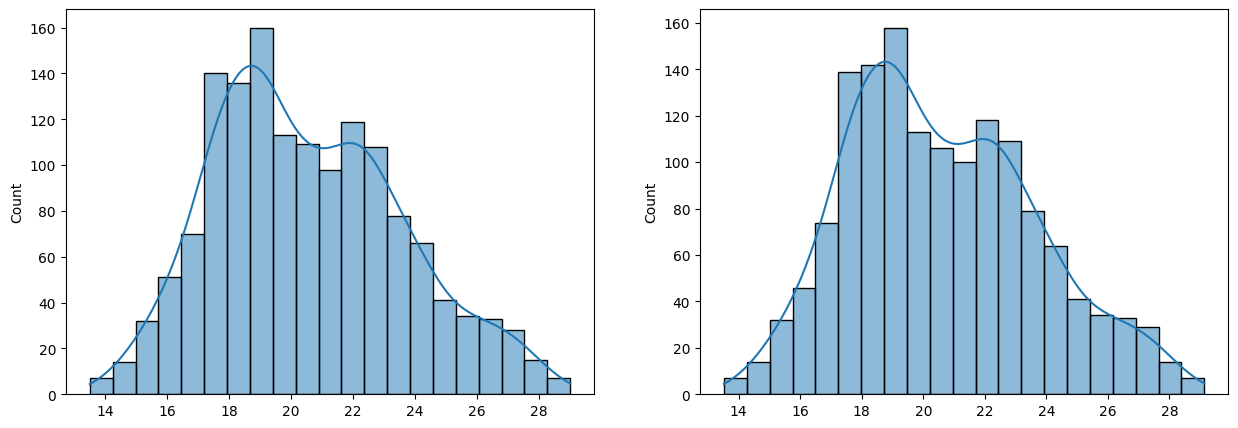

In [82]:
figure = plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(ridgeregressor,kde = True)
plt.subplot(1,2,2)
sns.histplot(lassoregressor,kde = True)

In [83]:
result = pd.DataFrame(df['Id'])

In [84]:
result['Prediction'] = lassoregressor

In [85]:
result

Id  Prediction
0     1461   17.975193
1     1462   19.387185
2     1463   20.829408
3     1464   21.926839
4     1465   23.538213
...    ...         ...
1454  2915   14.743156
1455  2916   15.367434
1456  2917   20.034717
1457  2918   18.403234
1458  2919   22.665765

[1459 rows x 2 columns]

In [86]:
result.to_csv('Result.csv', index = False)